In [22]:
sys.path.append(f'../FinanceHub')

from calendars import DayCounts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [23]:
def calc_du(reference_date, expiry_dates):
    t = pd.to_datetime(reference_date)
    dc = DayCounts('BUS/252', calendar='anbima')
    du = []
    for date in expiry_dates:
        T = pd.to_datetime(date)
        du.append(dc.days(t, T))
    return du

def nelson_siegel_svensson(n, beta: list, lambdas: list):
    div1 = n/lambdas[0]
    div2 = n/lambdas[1]

    exp1 = (1 - math.exp(-div1))/div1
    exp2 = (1 - math.exp(-div2))/div2
    t2 = beta[1] * exp1
    t3 = beta[2] * (exp1 - math.exp(-div1))
    t4 = beta[3] * (exp2 - math.exp(-div2))

    return beta[0] + t2 + t3 + t4

reference_date = '2021-03-17'

ipca_betas = [0.0520, -0.0444, -0.3072, -0.0330]
ipca_lambdas = [0.165582104, 3.888024883]

pre_betas = [0.1045, -0.0786, -0.0745, -0.0325]
pre_lambdas = [0.452406804, 4.144218815]

NTNB_expiry_dates = [
    '2021-05-15', '2022-08-15', '2023-03-15', '2023-05-15', '2024-08-15', '2025-05-15', '2026-08-15', '2028-08-15',
    '2030-08-15', '2035-08-15', '2040-08-15', '2045-05-15', '2050-08-15', '2055-05-15'
]

NTNB_du = calc_du(reference_date, NTNB_expiry_dates)

years = [d/252 for d in NTNB_du]

pre_rates = 100*np.array([nelson_siegel_svensson(n, pre_betas, pre_lambdas) for n in years])
ipca_rates = 100*np.array([nelson_siegel_svensson(n, ipca_betas, ipca_lambdas) for n in years])
implied = pre_rates - ipca_rates
print(implied)


[8.4834434  5.03487286 4.86367812 4.86381997 4.96750426 5.0189
 5.07302402 5.11423638 5.13335246 5.15527812 5.16965248 5.18122697
 5.19171934 5.19923385]


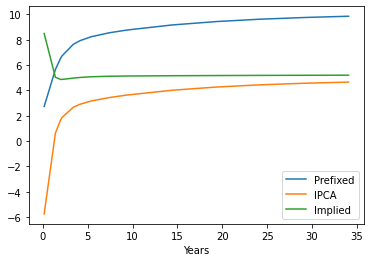

In [24]:
pre_df = pd.DataFrame({'Years': years, 'Prefixed': pre_rates})
ipca_df = pd.DataFrame({'Years': years, 'IPCA': ipca_rates})
implied_df = pd.DataFrame({'Years': years, 'Implied': implied})

pre_plot = pre_df.plot(x="Years", y="Prefixed")
ipca_plot = ipca_df.plot(x="Years", y="IPCA", ax=pre_plot)
implied_plot = implied_df.plot(x="Years", y="Implied", ax=ipca_plot)
plt.show()


In [39]:
print("Implied Inflation for 2022: " + str(implied[1]))
print("Implied Inflation for 2023: " + str((implied[2] + implied[3])/2))
print("Implied Inflation for 2024: " + str(implied[4]))

print("Focus for 2022: " + str(3.51))
print("Focus for 2023: " + str(3.25))
print("Focus for 2024: " + str(3.25))

Implied Inflation for 2022: 5.0348728572998915
Implied Inflation for 2023: 4.863749043780812
Implied Inflation for 2024: 4.967504259717211
Focus for 2022: 3.51
Focus for 2023: 3.25
Focus for 2024: 3.25


A principal explicação para a diferença é o prêmio de risco no título pré-fixado. Como o rendimento desse título pode
variar muito dependendo da inflação real realizada, diferentemente do título IPCA que segue a inflação, logo exige-se
um prêmio no título pré-fixado devido à incerteza de ganhos.
Além do prêmio de risco há também a diferença de liquidez nos títulos, sendo que o pré-fixado tem um volume maior que
os títulos pós-fixados. Os títulos mais líquidos são mais fáceis de serem negociados sem alteração de preço, enquanto
que ao negociar um título de menor liquidez será necessário chegar ao um acordo entre as duas partes, podendo haver
diferenças no preço original. Assim o título atrelado a IPCA exige um prêmio de risco de liquidez para ser carregado.